In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv('../../US_Accidents_May19_Migrated Data.csv')

In [3]:
df.head()

,Airport_Code,Amenity,Astronomical_Twilight,Bump,Calculation1,City,Civil_Twilight,count of Bump,Count of Crossing,count Traffic Signal,...,Humidity(%),Number of Records,Precipitation(in),Pressure(in),Records,Start_Lat,Start_Lng,TMC,Wind_Chill(F),Wind_Speed(mph)
0,NaN,False,Day,False,Remaining,Garnet Valley,Day,0,0,0,...,NaN,1,NaN,NaN,1,39.852940,-75.461739,201.0,NaN,NaN
1,KDWH,False,Day,False,Remaining,Spring,Day,0,0,0,...,82.0,1,NaN,30.02,1,30.159246,-95.510826,201.0,NaN,5.8
2,KDSM,False,Day,False,Remaining,West des Moines,Day,0,0,0,...,79.0,1,NaN,30.04,1,41.586887,-93.806496,201.0,34.3,11.5
3,KCPS,False,Day,False,Remaining,Saint Louis,Day,0,0,0,...,84.0,1,NaN,30.10,1,38.634579,-90.186806,201.0,NaN,12.7
4,KXBP,False,Day,False,Remaining,Springtown,Day,0,0,0,...,96.0,1,NaN,29.95,1,32.930958,-97.641068,201.0,NaN,5.8


In [4]:
df.shape

(2243939, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 57 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Airport_Code           object 
 1   Amenity                bool   
 2   Astronomical_Twilight  object 
 3   Bump                   bool   
 4   Calculation1           object 
 5   City                   object 
 6   Civil_Twilight         object 
 7   count of Bump          int64  
 8   Count of Crossing      int64  
 9   count Traffic Signal   int64  
 10  Country                object 
 11  County                 object 
 12  Crossing               bool   
 13  Description            object 
 14  End_Lat                float64
 15  End_Lng                float64
 16  End_Time               object 
 17  Give_Way               bool   
 18  ID                     object 
 19  Junction               bool   
 20  Nautical_Twilight      object 
 21  No_Exit                bool   
 22  Number            

In [6]:
df.describe()

,count of Bump,Count of Crossing,count Traffic Signal,End_Lat,End_Lng,Number,Severity,Temperature(F),Visibility(mi),Count of accidents,...,Humidity(%),Number of Records,Precipitation(in),Pressure(in),Records,Start_Lat,Start_Lng,TMC,Wind_Chill(F),Wind_Speed(mph)
count,2.243939e+06,2.243939e+06,2.243939e+06,516762.000000,516762.000000,785537.000000,2.243939e+06,2.181674e+06,2.172579e+06,2.243939e+06,...,2.179472e+06,2243939.0,264473.000000,2.186659e+06,2.243939e+06,2.243939e+06,2.243939e+06,1.727177e+06,391569.000000,1.800985e+06
mean,1.065091e-04,5.427197e-02,1.598297e-01,37.443109,-96.527543,5625.281008,2.382692e+00,6.123244e+01,9.124096e+00,9.997121e-01,...,6.592758e+01,1.0,0.060439,3.003747e+01,9.997121e-01,3.646348e+01,-9.485567e+01,2.073527e+02,26.042067,8.844042e+00
std,1.031978e-02,2.265536e-01,3.664481e-01,5.126585,17.986406,11071.872898,5.488029e-01,1.914616e+01,2.986359e+00,1.696478e-02,...,2.243013e+01,0.0,0.439698,2.267242e-01,1.696478e-02,4.958759e+00,1.709453e+01,1.940527e+01,13.478333,4.973200e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,24.570110,-124.497829,1.000000,0.000000e+00,-7.780000e+01,0.000000e+00,0.000000e+00,...,4.000000e+00,1.0,0.000000,0.000000e+00,0.000000e+00,2.457022e+01,-1.246238e+02,2.000000e+02,-65.900000,1.200000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,33.887450,-117.870577,803.000000,2.000000e+00,4.890000e+01,1.000000e+01,1.000000e+00,...,5.000000e+01,1.0,0.000000,2.992000e+01,1.000000e+00,3.348468e+01,-1.171362e+02,2.010000e+02,19.200000,5.800000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,38.038480,-90.192310,2672.000000,2.000000e+00,6.300000e+01,1.000000e+01,1.000000e+00,...,6.800000e+01,1.0,0.010000,3.003000e+01,1.000000e+00,3.586428e+01,-8.818469e+01,2.010000e+02,28.700000,8.100000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,41.393320,-80.895040,6846.000000,3.000000e+00,7.590000e+01,1.000000e+01,1.000000e+00,...,8.500000e+01,1.0,0.040000,3.015000e+01,1.000000e+00,4.042111e+01,-8.085453e+01,2.010000e+02,36.400000,1.150000e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,49.075000,-67.109242,961052.000000,4.000000e+00,1.706000e+02,1.400000e+02,1.000000e+00,...,1.000000e+02,1.0,10.800000,3.304000e+01,1.000000e+00,4.900076e+01,-6.711317e+01,4.060000e+02,45.200000,8.228000e+02


In [7]:
df.columns

Index(['Airport_Code', 'Amenity', 'Astronomical_Twilight', 'Bump',
       'Calculation1', 'City', 'Civil_Twilight', 'count of Bump',
       'Count of Crossing', 'count Traffic Signal', 'Country', 'County',
       'Crossing', 'Description', 'End_Lat', 'End_Lng', 'End_Time', 'Give_Way',
       'ID', 'Junction', 'Nautical_Twilight', 'No_Exit', 'Number', 'Railway',
       'Roundabout', 'Severity', 'Side', 'Source', 'Start_Time', 'State',
       'Station', 'Stop', 'Street', 'Sunrise_Sunset', 'Temperature(F)',
       'Timezone', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Visibility(mi)', 'Weather_Condition', 'Weather_Timestamp',
       'Wind_Direction', 'Zipcode', 'Count of accidents', 'count of county',
       'Distance(mi)', 'Humidity(%)', 'Number of Records', 'Precipitation(in)',
       'Pressure(in)', 'Records', 'Start_Lat', 'Start_Lng', 'TMC',
       'Wind_Chill(F)', 'Wind_Speed(mph)'],
      dtype='object')

In [8]:
df.isnull().sum()

Airport_Code               23664
Amenity                        0
Astronomical_Twilight         78
Bump                           0
Calculation1                   0
City                          68
Civil_Twilight                78
count of Bump                  0
Count of Crossing              0
count Traffic Signal           0
Country                        0
County                         0
Crossing                       0
Description                    1
End_Lat                  1727177
End_Lng                  1727177
End_Time                       0
Give_Way                       0
ID                             0
Junction                       0
Nautical_Twilight             78
No_Exit                        0
Number                   1458402
Railway                        0
Roundabout                     0
Severity                       0
Side                           1
Source                         0
Start_Time                     0
State                          0
Station   

/Users/zhaoyanan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: >

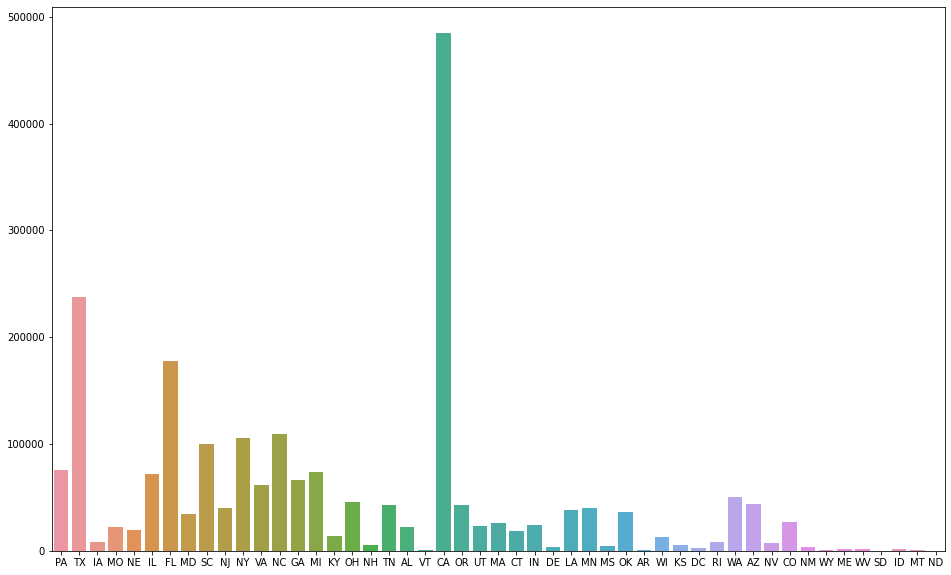

In [9]:
states = df.State.unique()
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['ID'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(states,count_by_state)

In [10]:
top_cities=df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]

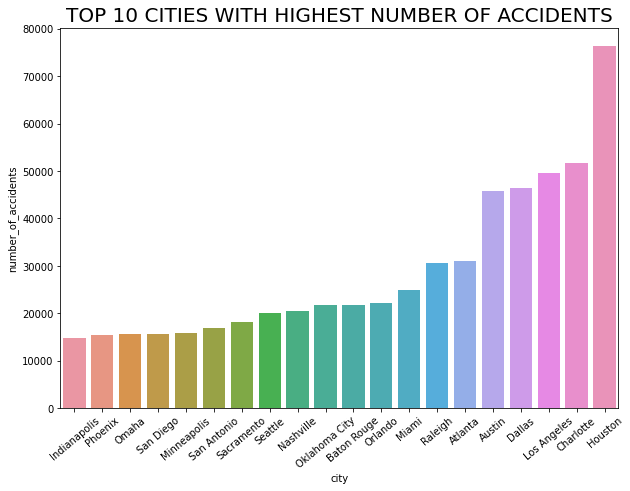

In [11]:
plt.figure(figsize=(10,7))
sns.barplot(x="city",y="number_of_accidents",data=top_cities)
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
plt.show()

In [12]:
top_streets=df["Street"].value_counts().sort_values()[-20:].reset_index()
top_streets.columns=["street_name","number_of_accidents"]

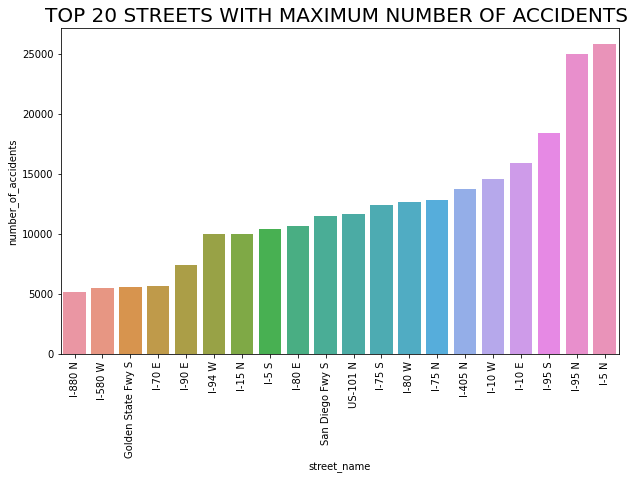

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"])
plt.xticks(rotation=90)
plt.title("TOP 20 STREETS WITH MAXIMUM NUMBER OF ACCIDENTS ",fontsize=20)
plt.show()

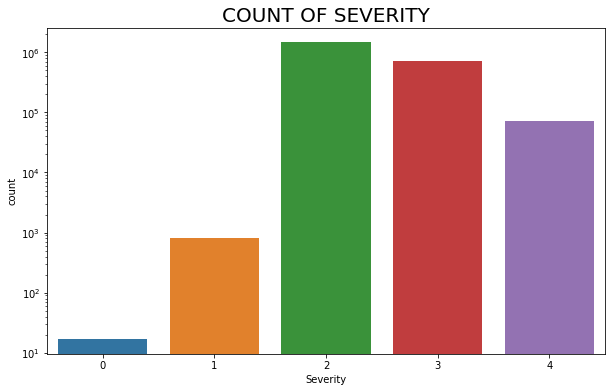

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x="Severity",data=df)
plt.yscale("log")
plt.title("COUNT OF SEVERITY",fontsize=20)
plt.show()

In [15]:

#df.dropna(subset='Severity')


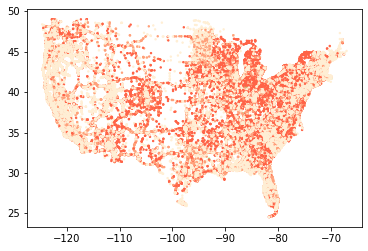

In [22]:
# Params

severity_cols = {
    0: 'green',
    1: 'palegreen',
    2: 'papayawhip',
    3: 'lightsalmon',
    4: 'tomato'
}

vcol = [severity_cols[i] for i in df['Severity']]

plt.scatter(df['Start_Lng'], df['Start_Lat'],c = vcol,s=2)

In [25]:
road_params = [
    'Amenity', 
    'Bump', 
    'Crossing',
    'Give_Way', 
    'Junction', 
    'No_Exit',
    'Railway', 
    'Roundabout', 
    'Station',
    'Stop', 
    'Traffic_Calming',
    'Traffic_Signal', 
    'Turning_Loop']

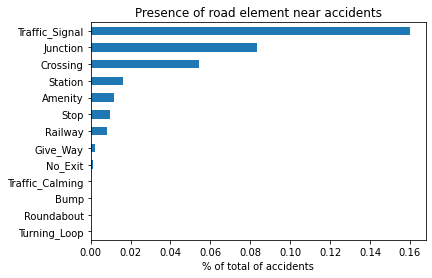

In [26]:
# % of accident including road params
road_param_percent = df.loc[:, road_params].sum() / len(df)
plt.title('Presence of road element near accidents')
plt.xlabel('% of total of accidents')
road_param_percent.sort_values().plot(kind='barh');

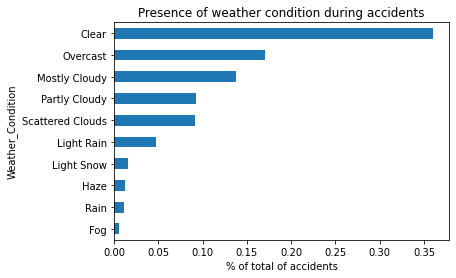

In [28]:
# % of accident by Weather_Condition
acc_by_weather_condition = df.groupby('Weather_Condition').size() / len(df)
acc_by_weather_condition = acc_by_weather_condition[acc_by_weather_condition > 0.005]
plt.title('Presence of weather condition during accidents')
plt.xlabel('% of total of accidents')
acc_by_weather_condition.sort_values().plot(kind='barh');

(0, 57)

ValueError: Found array with 0 sample(s) (shape=(0, 14)) while a minimum of 1 is required by ExtraTreesRegressor.